In [57]:
from tensorflow import keras
from PIL import Image
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers

model =  tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/datasets/ciphar10_train_model.h5")


In [58]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 32, 32, 18)        1368      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 16, 16, 18)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 18)        2934      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 8, 8, 18)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 36)          5868      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 4, 4, 36)        

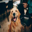

In [59]:
img = Image.open("/content/drive/MyDrive/Colab Notebooks/datasets/ciphar 10 dataset/dog.jpeg")
img = img.resize((32,32))
img

In [61]:
test = tf.reshape(tf.constant(np.array(img)/255,dtype=tf.float32), (-1,32,32,3))

preds = model.predict(test,verbose = False)[0]*100
# print(preds)
preds = tf.math.round(preds)
confidence = tf.reduce_max(preds)

index = int(tf.where(preds == confidence)[0][0])
pred = classes[index]
print(pred.title(),int(confidence),"%")

Dog 99 %
